Notes by: **Noman Iqbal** => **thenomaniqbal@gmail.com** 

# Model evaluation:

# Accuracy:

Accuracy is the percent of predictions that are correct. e.g If you have 100 datapoints and predict 70 of them correctly and 30 incorrectly, the accuracy is 70%.  
Accuracy is a good measure if our classes are evenly split, but is very misleading if we have imbalanced classes.
Always use caution with accuracy. we need to know the distribution of the classes to know how to interpret the value.  

# Confusion Matrix:

We can see all the important values in what is called the Confusion Matrix (or Error Matrix or Table of Confusion).  
The Confusion Matrix is a table showing four values:  
• Datapoints we predicted positive that are actually positive  
• Datapoints we predicted positive that are actually negative  
• Datapoints we predicted negative that are actually positive  
• Datapoints we predicted negative that are actually negative  

The first and fourth are the datapoints we predicted correctly and the second and third are the datapoints we predicted incorrectly.  
suppose the following confusion matrix.  

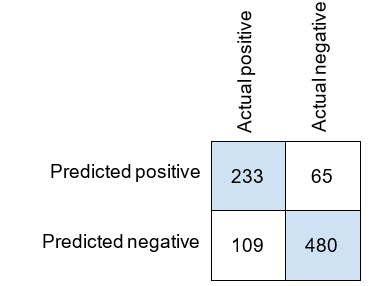

The blue shaded squares are the counts of the predictions that we got correct. So of the 342 passengers that survived, we predicted 233 of them correctly (and 109 of them incorrectly). Of the 545 passengers that didn’t survive, we predicted 480 correctly (and 65 incorrectly).  

We can use the confusion matrix to compute the accuracy. As a reminder, the accuracy is the number of datapoints predicted correctly divided by the total number of datapoints.  
(233+480)/(233+65+109+480) = 713/887 = 80.38%  
The confusion matrix fully describes how a model performs on a dataset, though is difficult to use to compare models.  

## True Positives, True Negatives, False Positives, False Negatives:

We have names for each square of the confusion matrix.  
A true positive (TP) is a datapoint we predicted positively that we were correct about.
A false positive (FP) is a datapoint we predicted positively that we were incorrect about.  
A false negative (FN) is a datapoint we predicted negatively that we were incorrect about. 
A true negative (TN) is a datapoint we predicted negatively that we were correct about.  
 
The four values of the confusion matrix (TP,  FP, FN, TN) are used to compute several different metrics that we’ll use later on.  

# Precision and Recall:

Two commonly used metrics for classification are precision and recall.  

## Precision:

Precision is the percent of the model's positive predictions that are correct.  
Precision = positives predicted correctly/positive predictions = TP/TP+FP  
If we look at our confusion matrix for our model for the Titanic dataset, we can calculate the precision.  
precision = 233 / (233 + 65) = 0.7819  
Precision is a measure of how precise the model is with its positive predictions.  

## Recall:

Recall is the percent of positive cases that the model predicts correctly.  
Recall = positives predicted correctly/positive cases = TP/TP+FN  
If we look at our confusion matrix for our model for the Titanic dataset, we can calculate the recall.  
recall = 233 / (233 + 109) = 0.6813  
Recall is a measure of how many of the positive cases the model can recall.  

# Precision & Recall Trade-off:

We often will be in a situation of choosing between increasing the recall (while lowering the precision) or increasing the precision (and lowering the recall). It will depend on the situation which we’ll want to maximize.  

For example, let’s say we’re building a model to predict if a credit card charge is fraudulent. The positive cases for our model are fraudulent charges and the negative cases are legitimate charges.  

Let’s consider two scenarios:  

1. If we predict the charge is fraudulent, we’ll reject the charge.  
2. If we predict the charge is fraudulent, we’ll call the customer to confirm the charge.  
In case 1, it’s a huge inconvenience for the customer when the model predicts fraud incorrectly (a false positive). In case 2, a false positive is a minor inconvenience for the customer.  

**The higher the false positives, the lower the precision**. Because of the high cost to false positives in the first case, it would be worth having a low recall in order to have a very high precision. In case 2, you would want more of a balance between precision and recall.  
There’s no hard and fast rule on what values of precision and recall we're shooting for. It always depends on the dataset and the application. 

# F1 Score:

Accuracy was an appealing metric because it was a single number. Precision and recall are two numbers so it’s not always obvious how to choose between two models if one has a higher precision and the other has a higher recall. The F1 score is an average of precision and recall so that we have a single score for our model.  
Here’s the mathematical formula for the F1 score.  
$F1=2 * \frac{precision.recall}{precision+recall}$  
The precision in case of titanic dataset are 0.7819 and the recall is 0.6813 respectively.  
The F1 score is as follows.  
2 (0.7819) (0.6813) / (0.7819 + 0.6813) = 0.7281  
The F1 score is the harmonic mean of the precision and recall values.  
**Accuracy, Precision, Recall & F1 Score in Sklearn**  

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
df


,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare,male
0,0,3,male,22.0,1,0,7.2500,True
1,1,1,female,38.0,1,0,71.2833,False
2,1,3,female,26.0,0,0,7.9250,False
3,1,1,female,35.0,1,0,53.1000,False
4,0,3,male,35.0,0,0,8.0500,True
...,...,...,...,...,...,...,...,...
882,0,2,male,27.0,0,0,13.0000,True
883,1,1,female,19.0,0,0,30.0000,False
884,0,3,female,7.0,1,2,23.4500,False
885,1,1,male,26.0,0,0,30.0000,True


In [2]:
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values
model = LogisticRegression()
model.fit(X, y)
y_pred = model.predict(X)

print("accuracy:", accuracy_score(y, y_pred))
print("precision:", precision_score(y, y_pred))
print("recall:", recall_score(y, y_pred))
print("f1 score:", f1_score(y, y_pred))
#Scikit-learn has a confusion matrix function that we can use to get the four values
# in the confusion matrix (true positives, false positives, false negatives, and true negatives). 
print(confusion_matrix(y, y_pred))

accuracy: 0.8049605411499436
precision: 0.7734627831715211
recall: 0.6988304093567251
f1 score: 0.7342549923195083
[[475  70]
 [103 239]]


We see that the accuracy is 80% which means that 80% of the model’s predictions are correct. The precision is 78%, which we recall is the percent of the model’s positive predictions that are correct. The recall is 68%, which is the percent of the positive cases that the model predicted correctly. The F1 score is 73%, which is an average of the precision and recall. 

#  Overfitting:

So far we’ve built a model with all of our data and then seen how well it performed on the same data. Some times we will face overfitting, which is when we perform well on the data the model has already seen, but we don’t perform well on new data. We can visually see an overfit model as follows.

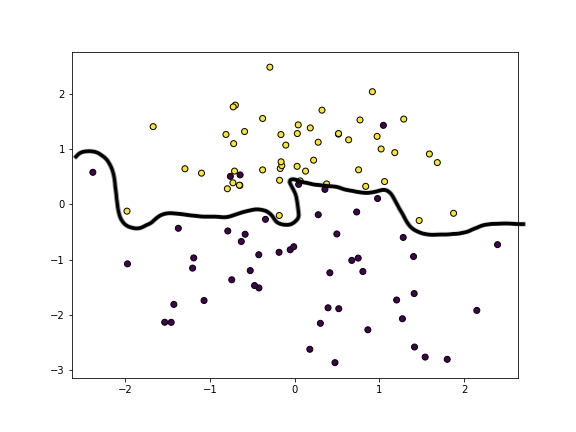

The line is too closely trying to get every single datapoint on the correct side of the line but it is missing the essence of the data. In the graph we can see that we've done a pretty good job of getting the yellow dots on the top and the purple dots on the bottom, but it isn’t capturing what's going on. A single outlier point could really throw off the location of the line. While the model would get a great score on the data it's already seen, it's unlikely to perform well on new data.
The more features we have in our dataset, the more prone we'll be to overfitting.

# Training Set and Test Set:

To give a model a fair assessment, we’d like to know how well our data would perform on data it hasn’t seen yet.  
In action, our model will be making predictions on data we don’t know the answer to, so we'd like to evaluate how well our model does on new data, not just the data it's already seen. To simulate making predictions on new unseen data, we can break our dataset into a training set and a test set. The training set is used for building the models. The test set is used for evaluating the models. We split our data before building the model, thus the model has no knowledge of the test set and we'll be giving it a fair assessment.

If our dataset has 200 datapoints in it, breaking it into a training set and test set might look as follows.  
training set=150 datapoints, testing set= 50 datapoints  
A standard breakdown is to put 70-80% of our data in the training set and 20-30% in the test set. Using less data in the training set means that our model won’t have as much data to learn from, so we want to give it as much as possible while still leaving enough for evaluation.  

previously, we talked about the trade-off between precision and recall. With a Logistic Regression model, we have an easy way of shifting between emphasizing precision and emphasizing recall. The Logistic Regression model doesn’t just return a prediction, but it returns a probability value between 0 and 1. Typically, we say if the value is >=0.5, we predict the passenger survived, and if the value is <0.5, the passenger didn’t survive. However, we could choose any threshold between 0 and 1.  

If we make the threshold higher, we’ll have fewer positive predictions, but our positive predictions are more likely to be correct. This means that the precision would be higher and the recall lower. On the other hand, if we make the threshold lower, we’ll have more positive predictions, so we’re more likely to catch all the positive cases. This means that the recall would be higher and the precision lower.  

Each choice of a threshold is a different model. An ROC (Receiver operating characteristic) Curve is a graph showing all of the possible models and their performance.  


# Sensitivity & Specificity:

A ROC Curve is a graph of the sensitivity vs. the specificity. These values demonstrate the same trade-off that precision and recall demonstrate.  
Let's look back at the Confusion Matrix, as we'll be using it to define sensitivity and specificity. The sensitivity is another term for the recall, which is the true positive rate.  
**Sensitivity = recall =** positives predicted correctly/positive predictions = TP/TP+FN  
The specificity is the true negative rate. It’s calculated as follows:  
**specificity =** negatives predicted correctly/positive predictions = TN/TN+FP  
Let's calculate the sensitivity and specificity for titanic dataset.  
Sensitivity = 61/96 = 0.6354  
Specificity = 105/126 = 0.8333  
The goal is to maximize these two values, though generally making one larger makes the other lower. It will depend on the situation whether we put more emphasis on sensitivity or specificity.  
While we generally look at precision and recall values, for graphing the standard is to use the sensitivity and specificity. It is possible to build a precision-recall curve, but this isn’t commonly done.  

# Cross Validation:

When model is split into training and testing it can be possible that specific type of data point may go entirely into either training or testing portion. This would lead the model to perform poorly and can cause over-fitting and underfitting problems, which can be well avoided with cross validation techniques.

## K-fold cross validation:  

We are doing evaluation because we want to get an accurate measure of how well the model performs. If our dataset is small, our test set is going to be small. Thus it might not be a good random assortment of datapoints and by random chance end up with easy or difficult datapoints in our evaluation set.  
Since our goal is to get the best possible measure of our metrics (accuracy, precision, recall and F1 score), we can do a little better than just a single training and test set.  
Instead of doing a single train/test split, we’ll split our data into a training set and test set multiple times.  
Now, for each training set, we build a model and evaluate it using the associated test set. Thus we build 5 models and calculate 5 scores.  

Let’s say we are trying to calculate the accuracy score for our model.  

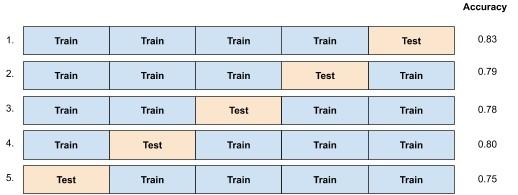

We report the accuracy as the mean of the 5 values:  
(0.83+0.79+0.78+0.80+0.75)/5 = 0.79  
If we had just done a single training and test set and had randomly gotten the first one, we would have reported an accuracy of 0.83. If we had randomly gotten the last one, we would have reported an accuracy of 0.75. Averaging all these possible values helps eliminate the impact of which test set a datapoint lands in.  

You will only see values this different when you have a small dataset. With large datasets we often just do a training and test set for simplicity.  

This process for creating multiple training and test sets is called **k-fold cross validation**. The k is the number of chunks we split our dataset into. The standard number is 5, as we did in our example above.
Our goal in cross validation is to get accurate measures for our metrics (accuracy, precision, recall). We are building extra models in order to feel confident in the numbers we calculate and report.  

**Final Model Choice in k-fold Cross Validation:**  

Now we have built 5 models instead of just one. How do we decide on a single model to use?  

These 5 models were built just for evaluation purposes, so that we can report the metric values. We don’t actually need these models and want to build the best possible model. The best possible model is going to be a model that uses all of the data. So we keep track of our calculated values for our evaluation metrics and then build a model using all of the data. 

This may seem incredibly wasteful, but computers have a lot of computation power, so it's worth using a little extra to make sure we're reporting the right values for our evaluation metrics. We'll be using these values to make decisions, so calculating them correctly is very important.  
Computation power for building a model can be a concern when the dataset is large. In these cases, we just do a train test split.

In [3]:
from sklearn.model_selection import KFold

# dataset with just 6 datapoints and 2 features and a 3-fold cross validation on the dataset. 
# We’ll take the first 6 rows from the Titanic dataset and use just the Age and Fare columns.
X = df[['Age', 'Fare']].values[:6]
y = df['Survived'].values[:6]

# shuffle (whether or not to randomize the order of the data).
kf = KFold(n_splits=3, shuffle=True)
print(list(kf.split(X)))

[(array([0, 1, 2, 4]), array([3, 5])), (array([1, 2, 3, 5]), array([0, 4])), (array([0, 3, 4, 5]), array([1, 2]))]


As we can see, we have 3 training and testing sets as expected. The first training set is made up of datapoints 0, 2, 3, 5 and the test set is made up of datapoints 1, 4.

In [5]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

scores = []
kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = LogisticRegression()
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
print(scores)
print(np.mean(scores))
final_model = LogisticRegression()
final_model.fit(X, y)

print(list(kf.split(X[5])))
# As we can see, we have 5 training and testing sets as expected. 

[0.7359550561797753, 0.8033707865168539, 0.8757062146892656, 0.7627118644067796, 0.8361581920903954]
0.802780422776614
[(array([0, 1, 3, 4]), array([2, 5])), (array([1, 2, 3, 4, 5]), array([0])), (array([0, 1, 2, 3, 5]), array([4])), (array([0, 2, 3, 4, 5]), array([1])), (array([0, 1, 2, 4, 5]), array([3]))]


---